In [276]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [277]:
Matches = pd.read_csv('Data/WorldCupMatches.csv')
Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [278]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [279]:
Matches.dropna(inplace=True)

In [280]:
FinalMatches =Matches[Matches['Stage'].str.contains('Final')]

### Kiểm tra trùng lặp Id trận đấu

In [281]:
len(FinalMatches['MatchID'].unique())

19

In [282]:
FinalMatches['MatchID'].count()

20

In [283]:
FinalMatchesUnique = FinalMatches.groupby(['MatchID'])['Stage'].count()
FinalMatchesUnique = FinalMatchesUnique[FinalMatchesUnique.values>1]
FinalMatchesUnique


MatchID
300186501    2
Name: Stage, dtype: int64

- Kiểm tra lại có trùng lặp hoàn toàn hay không?

In [284]:
FinalMatches[FinalMatches['MatchID'] == FinalMatchesUnique.index[0]]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
828,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,74738.0,0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959,300186501,GER,ARG
851,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,74738.0,0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959,300186501,GER,ARG


In [285]:
FinalMatches.drop_duplicates(subset=['MatchID'],keep='last',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_26096\819882105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalMatches.drop_duplicates(subset=['MatchID'],keep='last',inplace=True)


19

In [286]:
FinalMatches.reset_index()

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,17,1930,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4,2,Argentina,...,68346.0,1,2,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405,1087,URU,ARG
1,34,1934,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,...,55000.0,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490,1134,ITA,TCH
2,52,1938,19 Jun 1938 - 17:00,Final,Stade Olympique,Colombes,Italy,4,2,Hungary,...,45000.0,3,1,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487,1174,ITA,HUN
3,100,1954,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany FR,3,2,Hungary,...,62500.0,2,2,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484,1278,FRG,HUN
4,135,1958,29 Jun 1958 - 15:00,Final,Rasunda Stadium,Solna,Brazil,5,2,Sweden,...,49737.0,2,1,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482,1343,BRA,SWE
5,167,1962,17 Jun 1962 - 14:30,Final,Nacional,Santiago De Chile,Brazil,3,1,Czechoslovakia,...,68679.0,1,1,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480,1463,BRA,TCH
6,199,1966,30 Jul 1966 - 15:00,Final,Wembley Stadium,London,England,4,2,Germany FR,...,96924.0,0,0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478,1633,ENG,FRG
7,231,1970,21 Jun 1970 - 12:00,Final,Estadio Azteca,Mexico City,Brazil,4,1,Italy,...,107412.0,1,1,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476,1765,BRA,ITA
8,269,1974,07 July 1974 - 16:00,Final,Olympiastadion,Munich,Netherlands,1,2,Germany FR,...,78200.0,1,2,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605,2063,NED,FRG
9,307,1978,25 Jun 1978 - 15:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3,1,Netherlands,...,71483.0,0,0,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639,2198,ARG,NED


### Vẽ biểu đồ so sánh số lần các đội tuyển quốc gia vào trận chung kết ít nhất 1 lần

In [287]:
homeTeamInFinal=FinalMatches.groupby(['Home Team Name'])['Stage'].count()
awayTeamInFinal=FinalMatches.groupby(['Away Team Name'])['Stage'].count()
Final_dicts = homeTeamInFinal.add(awayTeamInFinal, fill_value=0)    
        
print(Final_dicts)


Argentina         5.0
Brazil            6.0
Czechoslovakia    2.0
England           1.0
France            2.0
Germany           2.0
Germany FR        6.0
Hungary           2.0
Italy             6.0
Netherlands       3.0
Spain             1.0
Sweden            1.0
Uruguay           1.0
Name: Stage, dtype: float64


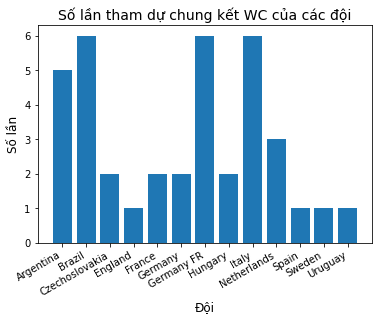

In [288]:

plt.bar(Final_dicts.index,Final_dicts.values)
plt.title('Số lần tham dự chung kết WC của các đội',fontsize = 14)
plt.xlabel('Đội',fontsize = 12)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Số lần',fontsize = 12)
plt.show()

### Vẽ biểu đồ so sánh số lần vô địch của các đội tuyển

In [289]:
Final_dicts = {}

for i in range(0,FinalMatches['Stage'].count(),1):
    winteam = ''
    if (FinalMatches['Home Team Goals'].iloc[i] > FinalMatches['Away Team Goals'].iloc[i]):
        winteam = FinalMatches['Home Team Name'].iloc[i]
    elif (FinalMatches['Home Team Goals'].iloc[i] < FinalMatches['Away Team Goals'].iloc[i]):
        winteam = FinalMatches['Away Team Name'].iloc[i]
    # Hòa phải đá penalties
    else:
        hometeam = FinalMatches['Home Team Name'].iloc[i]
        if (FinalMatches['Win conditions'].str.contains(hometeam).iloc[i]):
            winteam = FinalMatches['Home Team Name'].iloc[i]
        else:
            winteam = FinalMatches['Away Team Name'].iloc[i]
            
    if winteam in Final_dicts.keys():
        Final_dicts[winteam] += 1
    else:
        Final_dicts[winteam] = 1     

Final_dicts
    



{'Uruguay': 1,
 'Italy': 4,
 'Germany FR': 3,
 'Brazil': 5,
 'England': 1,
 'Argentina': 2,
 'France': 1,
 'Spain': 1,
 'Germany': 1}

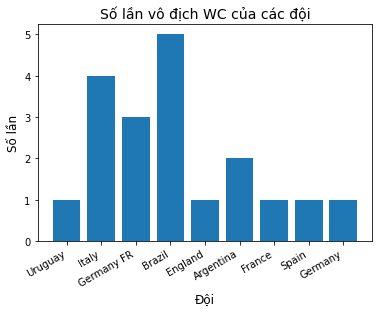

In [290]:
plt.bar(Final_dicts.keys(),Final_dicts.values())
plt.title('Số lần vô địch WC của các đội',fontsize = 14)
plt.xlabel('Đội',fontsize = 12)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Số lần',fontsize = 12)
plt.show()